In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [2]:
from google.colab import drive
drive.mount('./mount')

Mounted at ./mount


In [212]:
data = pd.read_csv('mount/My Drive/esport/6/BIPA_data.csv',index_col = 0)
champStat = pd.read_csv('mount/MyDrive/esport/6/champ_stats.csv',index_col=0)

In [213]:
data.head(3)

,gameId,createDate,tierRank,position,teamId,summonerId,championId,result,level,championsKilled,numDeaths,assists,neutralMinionsKilled,turretsKilled,barracksKilled,minionsKilled,goldEarned,physicalDamageDealtToChampions,magicDamageDealtPlayer,physicalDamageTaken,sightWardsBoughtInGame,visionWardsBoughtInGame,wardKilled,wardPlaced,totalHeal,totalDamageDealtToChampions,totalDamageDealt,totalDamageTaken,neutralMinionsKilledEnemyJungle,neutralMinionsKilledTeamJungle,visionScore,damageSelfMitigated,damageDealtToObjectives,damageDealtToTurrets,lane,gameLength,version
0,5383880006,2021-08-11 06:59:31,P318,S,200,3210877,99,WIN,10,4,1,5,0,0,0,15,6083,405,5184,2167,0,1,1,5,0,5590,27286,3602,0,0,11,2830,2181,2181,NONE,972,11.16.390.1945
1,5383880006,2021-08-11 06:59:31,P466,S,100,7550211,35,LOSE,8,1,3,3,6,0,0,7,4118,280,3186,3898,0,3,3,6,0,3827,10327,5077,0,2,24,2013,0,0,NONE,972,11.16.390.1945
2,5383880006,2021-08-11 06:59:31,P329,M,200,9306696,266,WIN,11,5,1,5,0,0,0,100,6769,9151,0,3803,0,4,5,7,4765,9467,47092,11029,0,0,15,6158,585,585,NONE,972,11.16.390.1945


In [218]:
sorted(data['gameLength'].unique())

[190,
 191,
 192,
 193,
 194,
 195,
 196,
 197,
 198,
 199,
 200,
 201,
 202,
 203,
 204,
 205,
 206,
 207,
 208,
 209,
 210,
 211,
 212,
 213,
 214,
 215,
 216,
 217,
 218,
 219,
 220,
 221,
 222,
 224,
 225,
 232,
 239,
 443,
 460,
 478,
 534,
 575,
 577,
 579,
 587,
 596,
 597,
 598,
 609,
 611,
 612,
 613,
 614,
 615,
 616,
 617,
 618,
 619,
 620,
 621,
 622,
 623,
 624,
 625,
 626,
 627,
 628,
 629,
 630,
 631,
 632,
 633,
 634,
 635,
 636,
 637,
 638,
 639,
 640,
 641,
 642,
 643,
 644,
 645,
 646,
 647,
 648,
 649,
 650,
 651,
 652,
 653,
 654,
 655,
 656,
 657,
 658,
 659,
 660,
 661,
 662,
 663,
 664,
 665,
 666,
 667,
 668,
 669,
 670,
 671,
 672,
 673,
 674,
 675,
 676,
 677,
 678,
 679,
 680,
 681,
 682,
 683,
 684,
 685,
 686,
 687,
 688,
 689,
 690,
 691,
 692,
 693,
 694,
 695,
 696,
 698,
 699,
 700,
 701,
 702,
 703,
 704,
 705,
 706,
 707,
 708,
 709,
 710,
 711,
 712,
 713,
 714,
 715,
 716,
 717,
 718,
 719,
 720,
 721,
 722,
 723,
 724,
 725,
 726,
 727,
 728,
 729

In [11]:
data.columns

Index(['gameId', 'createDate', 'tierRank', 'position', 'teamId', 'summonerId',
       'championId', 'result', 'level', 'championsKilled', 'numDeaths',
       'assists', 'neutralMinionsKilled', 'turretsKilled', 'barracksKilled',
       'minionsKilled', 'goldEarned', 'physicalDamageDealtToChampions',
       'magicDamageDealtPlayer', 'physicalDamageTaken',
       'sightWardsBoughtInGame', 'visionWardsBoughtInGame', 'wardKilled',
       'wardPlaced', 'totalHeal', 'totalDamageDealtToChampions',
       'totalDamageDealt', 'totalDamageTaken',
       'neutralMinionsKilledEnemyJungle', 'neutralMinionsKilledTeamJungle',
       'visionScore', 'damageSelfMitigated', 'damageDealtToObjectives',
       'damageDealtToTurrets', 'lane', 'gameLength', 'version'],
      dtype='object')

In [7]:
champStat.head(3)

,championName,versionIndex,version,hp,hpperlevel,mp,mpperlevel,movespeed,armor,armorperlevel,spellblock,spellblockperlevel,attackrange,hpregen,hpregenperlevel,mpregen,mpregenperlevel,crit,critperlevel,attackdamage,attackdamageperlevel,attackspeedperlevel,attackspeed,hp_18,mp_18,armor_18,spellblock_18,hpregen_18,mpregen_18,crit_18,attackdamage_18,attackspeed_18
championId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,Annie,11.17,11.17.394.4489,524.0,88,418.0,25.0,335,19,4.0,30.0,0.50,625,5.5,0.55,8.0,0.8,0,0,50.0,2.63,1.36,0.579,2020.0,843.0,87.0,38.50,14.85,21.6,0,94.71,0.7129
2,Olaf,11.17,11.17.394.4489,575.0,100,316.0,42.0,350,35,3.0,32.0,1.25,125,8.5,0.90,7.5,0.6,0,0,68.0,3.50,2.70,0.694,2275.0,1030.0,86.0,53.25,23.80,17.7,0,127.50,1.0125
3,Galio,11.17,11.17.394.4489,562.0,112,500.0,40.0,335,24,3.5,32.0,1.25,150,8.0,0.80,9.5,0.7,0,0,59.0,3.50,1.50,0.625,2466.0,1180.0,83.5,53.25,21.60,21.4,0,118.50,0.7844


In [10]:
##7550211 

In [164]:
data = data[['tierRank', 'level', 'championsKilled', 'numDeaths', 'assists', 'goldEarned', 'wardKilled', 'wardPlaced', 'totalDamageDealtToChampions', 'gameLength']]

In [165]:
data.head(3) # tierRank : tier + rank + point

,tierRank,level,championsKilled,numDeaths,assists,goldEarned,wardKilled,wardPlaced,totalDamageDealtToChampions,gameLength
0,P318,10,4,1,5,6083,1,5,5590,972
1,P466,8,1,3,3,4118,3,6,3827,972
2,P329,11,5,1,5,6769,5,7,9467,972


tierRank

level / gameLength

championsKilled

numDeaths

assists

goldEarned / gameLength

wardKilled

wardPlaced

totalDamageDealtToChampions / gameLength

gameLength



In [160]:
data.describe()

,level,championsKilled,numDeaths,assists,goldEarned,wardKilled,wardPlaced,totalDamageDealtToChampions
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,13.346938,5.524811,5.541644,7.233780,10105.192982,2.729932,9.739892,15822.070128
std,2.938669,4.540394,3.221281,5.391585,3797.587118,2.825078,8.343522,10313.000453
min,1.000000,0.000000,0.000000,0.000000,664.000000,0.000000,0.000000,0.000000
25%,12.000000,2.000000,3.000000,3.000000,7442.000000,1.000000,5.000000,8305.000000
50%,14.000000,4.000000,5.000000,6.000000,9797.000000,2.000000,7.000000,13709.000000
75%,15.000000,8.000000,8.000000,10.000000,12504.000000,4.000000,11.000000,21045.000000
max,18.000000,52.000000,34.000000,46.000000,35836.000000,56.000000,226.000000,117810.000000


1 : 2002 / 2 : 5000 / 3 : 7330 / 4 : 879 / 
5 : 895 / 6 : 2950 / 7 : 7961 / 8 : 20050 / 9 : 38109 / 
10 : 63628 / 11 : 90928 / 12 : 117027 / 13 : 134833 / 14 : 139257 / 
15 : 128671 / 16 : 102034 / 17 : 69729 / 18 : 68717 / 

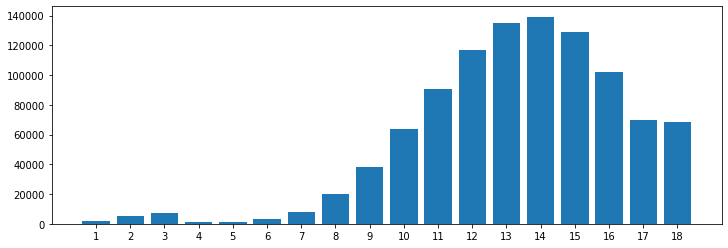

In [143]:
level = data['level']
level_len = len(level.unique())
level_num = [0 for i in range(level_len)] # level != 0

for i in range(1,level_len+1):
  level_num[i-1]=len(level[level==i])

num = range(1, level_len+1)

plt.figure(figsize=(12,4))
plt.xticks(num, range(1, level_len+1))
plt.bar(num, level_num)

for i in range(1,19):
  if i % 5 == 0:
    print()
  print(str(i) + ' : ' + str(len(data[data['level']==i])), end=' / ')

29 : 181 / 
30 : 120 / 31 : 84 / 32 : 64 / 33 : 33 / 34 : 29 / 
35 : 19 / 36 : 10 / 37 : 13 / 38 : 10 / 39 : 6 / 
40 : 2 / 41 : 1 / 42 : 2 / 43 : 2 / 44 : 0 / 
45 : 1 / 46 : 0 / 

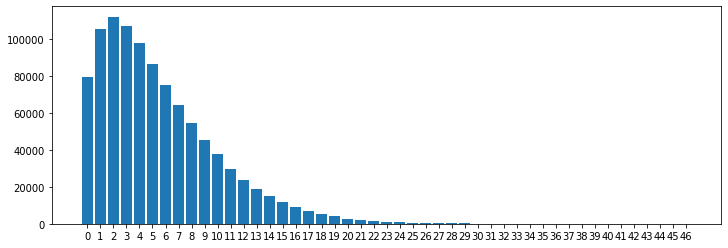

In [144]:
championsKilled = data['championsKilled']
championsKilled_len = len(championsKilled.unique())
championsKilled_num = [0 for i in range(championsKilled_len+1)]

for i in range(championsKilled_len+1):
  championsKilled_num[i]=len(championsKilled[championsKilled==i])

num = range(championsKilled_len+1)

plt.figure(figsize=(12,4))
plt.xticks(num, range(championsKilled_len+1))
plt.bar(num, championsKilled_num)

for i in range(29,47):
  if i % 5 == 0:
    print()
  print(str(i) + ' : ' + str(len(data[data['championsKilled']==i])), end=' / ')


0 : 42030 / 1 : 61375 / 2 : 83103 / 3 : 101497 / 4 : 113938 / 
5 : 118780 / 6 : 114353 / 7 : 102203 / 8 : 83808 / 9 : 63680 / 
10 : 44844 / 11 : 29157 / 12 : 17902 / 13 : 10487 / 14 : 5960 / 
15 : 3257 / 16 : 1727 / 17 : 895 / 18 : 471 / 19 : 247 / 
20 : 126 / 21 : 58 / 22 : 41 / 23 : 22 / 24 : 12 / 
25 : 10 / 26 : 3 / 27 : 5 / 28 : 4 / 29 : 2 / 
30 : 1 / 31 : 1 / 32 : 0 / 33 : 0 / 

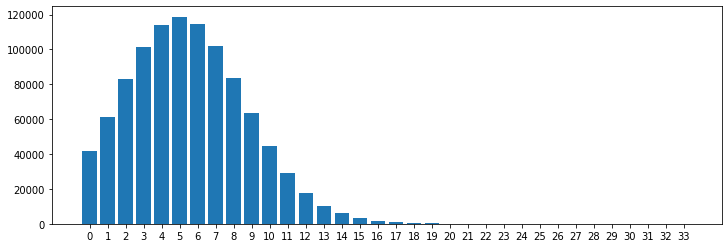

In [145]:
Deaths = data['numDeaths']
Deaths_len = len(Deaths.unique())
Deaths_num = [0 for i in range(Deaths_len+1)]

for i in range(numDeaths_len+1):
  Deaths_num[i]=len(Deaths[Deaths==i])

num = range(Deaths_len+1)

plt.figure(figsize=(12,4))
plt.xticks(num, range(Deaths_len+1))
plt.bar(num, Deaths_num)

for i in range(Deaths_len+1):
  if i % 5 == 0:
    print()
  print(str(i) + ' : ' + str(len(data[data['numDeaths']==i])), end=' / ')


0 : 54379 / 1 : 64459 / 2 : 76245 / 3 : 82271 / 4 : 84095 / 
5 : 82120 / 6 : 78226 / 7 : 71833 / 8 : 65200 / 9 : 57508 / 
10 : 49972 / 11 : 42504 / 12 : 36036 / 13 : 29919 / 14 : 24662 / 
15 : 19825 / 16 : 16437 / 17 : 13385 / 18 : 10779 / 19 : 8604 / 
20 : 6969 / 21 : 5482 / 22 : 4403 / 23 : 3572 / 24 : 2657 / 
25 : 2128 / 26 : 1622 / 27 : 1187 / 28 : 905 / 29 : 716 / 
30 : 544 / 31 : 393 / 32 : 292 / 33 : 185 / 

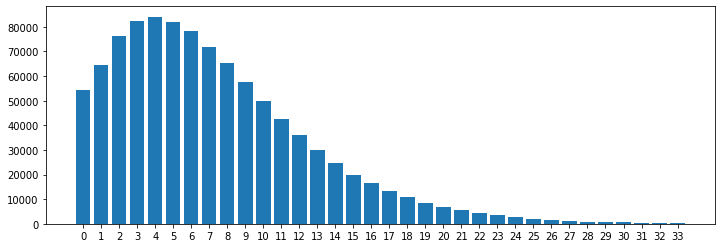

In [146]:
assists = data['assists']
assists_len = len(Deaths.unique())
assists_num = [0 for i in range(assists_len+1)]

for i in range(assists_len+1):
  assists_num[i]=len(assists[assists==i])

num = range(assists_len+1)

plt.figure(figsize=(12,4))
plt.xticks(num, range(assists_len+1))
plt.bar(num, assists_num)

for i in range(assists_len+1):
  if i % 5 == 0:
    print()
  print(str(i) + ' : ' + str(len(data[data['assists']==i])), end=' / ')

In [162]:
goldEarned = data['goldEarned']
goldEarned_len = len(goldEarned.unique())
goldEarned_num = [0 for i in range(goldEarned_len+1)] #범위나눠야됨

print(goldEarned_len)
"""
for i in range(goldEarned_len+1):
  goldEarned_num[i]=len(goldEarned[goldEarned==i])

num = range(goldEarned_len+1)

plt.figure(figsize=(12,4))
plt.xticks(num, range(goldEarned_len+1))
plt.bar(num, goldEarned_num)

for i in range(goldEarned_len+1):
  if i % 5 == 0:
    print()
  print(str(i) + ' : ' + str(len(data[data['goldEarned']==i])), end=' / ')
  """

23220


"\nfor i in range(goldEarned_len+1):\n  goldEarned_num[i]=len(goldEarned[goldEarned==i])\n\nnum = range(goldEarned_len+1)\n\nplt.figure(figsize=(12,4))\nplt.xticks(num, range(goldEarned_len+1))\nplt.bar(num, goldEarned_num)\n\nfor i in range(goldEarned_len+1):\n  if i % 5 == 0:\n    print()\n  print(str(i) + ' : ' + str(len(data[data['goldEarned']==i])), end=' / ')\n  "


0 : 214437 / 1 : 204447 / 2 : 164993 / 3 : 123516 / 4 : 88469 / 
5 : 63015 / 6 : 43598 / 7 : 30730 / 8 : 21180 / 9 : 14557 / 
10 : 9894 / 11 : 6733 / 12 : 4539 / 13 : 3071 / 14 : 2096 / 
15 : 1444 / 16 : 990 / 17 : 673 / 18 : 469 / 19 : 354 / 
20 : 234 / 21 : 156 / 22 : 110 / 23 : 85 / 24 : 54 / 
25 : 33 / 26 : 37 / 27 : 22 / 28 : 12 / 29 : 13 / 
30 : 12 / 31 : 7 / 32 : 7 / 33 : 4 / 34 : 1 / 
35 : 2 / 36 : 2 / 37 : 1 / 38 : 1 / 39 : 0 / 
40 : 0 / 41 : 1 / 

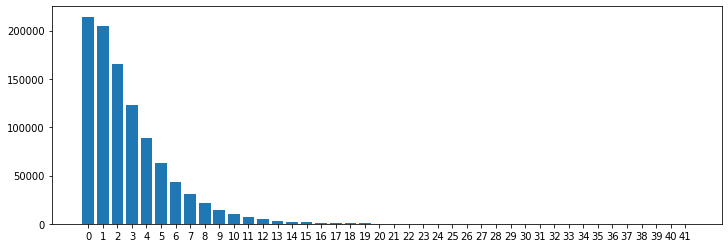

In [148]:
wardKilled = data['wardKilled']
wardKilled_len = len(wardKilled.unique())
wardKilled_num = [0 for i in range(wardKilled_len+1)]

for i in range(wardKilled_len+1):
  wardKilled_num[i]=len(wardKilled[wardKilled==i])

num = range(wardKilled_len+1)

plt.figure(figsize=(12,4))
plt.xticks(num, range(wardKilled_len+1))
plt.bar(num, wardKilled_num)

for i in range(wardKilled_len+1):
  if i % 5 == 0:
    print()
  print(str(i) + ' : ' + str(len(data[data['wardKilled']==i])), end=' / ')


0 : 17999 / 1 : 25812 / 2 : 37183 / 3 : 58541 / 4 : 78367 / 
5 : 93257 / 6 : 97917 / 7 : 94008 / 8 : 83507 / 9 : 70971 / 
10 : 56901 / 11 : 44365 / 12 : 34040 / 13 : 25780 / 14 : 19511 / 
15 : 15701 / 16 : 12776 / 17 : 10844 / 18 : 9666 / 19 : 8778 / 
20 : 8022 / 21 : 7646 / 22 : 7102 / 23 : 6809 / 24 : 6390 / 
25 : 5917 / 26 : 5545 / 27 : 5137 / 28 : 4943 / 29 : 4537 / 
30 : 4129 / 31 : 3862 / 32 : 3464 / 33 : 3194 / 34 : 2964 / 
35 : 2735 / 36 : 2403 / 37 : 2135 / 38 : 1886 / 39 : 1752 / 
40 : 1594 / 41 : 1397 / 42 : 1213 / 43 : 1028 / 44 : 1002 / 
45 : 919 / 46 : 747 / 47 : 642 / 48 : 600 / 49 : 488 / 
50 : 494 / 51 : 424 / 52 : 356 / 53 : 313 / 54 : 283 / 
55 : 213 / 56 : 221 / 57 : 192 / 58 : 161 / 59 : 141 / 
60 : 110 / 61 : 109 / 62 : 111 / 63 : 76 / 64 : 80 / 
65 : 59 / 66 : 63 / 67 : 42 / 68 : 54 / 69 : 28 / 
70 : 38 / 71 : 32 / 72 : 30 / 73 : 25 / 74 : 17 / 
75 : 21 / 76 : 13 / 77 : 12 / 78 : 7 / 79 : 21 / 
80 : 12 / 81 : 5 / 82 : 6 / 83 : 5 / 84 : 9 / 
85 : 6 / 86 : 7 / 87 

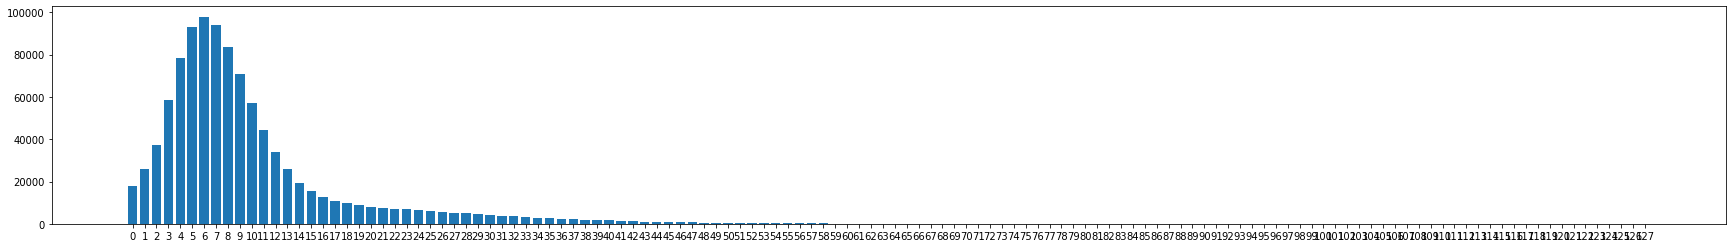

In [149]:
wardPlaced = data['wardPlaced']
wardPlaced_len = len(wardPlaced.unique())
wardPlaced_num = [0 for i in range(wardPlaced_len+1)]

for i in range(wardPlaced_len+1):
  wardPlaced_num[i]=len(wardPlaced[wardPlaced==i])

num = range(wardPlaced_len+1)

plt.figure(figsize=(30,4))
plt.xticks(num, range(wardPlaced_len+1))
plt.bar(num, wardPlaced_num)

for i in range(wardPlaced_len+1):
  if i % 5 == 0:
    print()
  print(str(i) + ' : ' + str(len(data[data['wardPlaced']==i])), end=' / ')

In [150]:
totalDamageDealtToChampions = data['totalDamageDealtToChampions']
totalDamageDealtToChampions_len = len(totalDamageDealtToChampions.unique())
totalDamageDealtToChampions_num = [0 for i in range(totalDamageDealtToChampions_len+1)] # 범위로 나눠서 구해야됨

print(totalDamageDealtToChampions_len)

#for i in range(totalDamageDealtToChampions_len+1):
#  totalDamageDealtToChampions_num[i]=len(totalDamageDealtToChampions[totalDamageDealtToChampions==i])

#num = range(totalDamageDealtToChampions_len+1)

#plt.figure(figsize=(30,4))
#plt.xticks(num, range(totalDamageDealtToChampions_len+1))
#plt.bar(num, totalDamageDealtToChampions_num)

#for i in range(totalDamageDealtToChampions_len+1):
#  print(str(i) + ' : ' + str(len(data[data['totalDamageDealtToChampions']==i])))

55412


In [206]:
data.describe(include='all')

,tierRank,level,championsKilled,numDeaths,assists,goldEarned,wardKilled,wardPlaced,totalDamageDealtToChampions,gameLength
count,977141,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
unique,3296,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,G40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,24048,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,13.346938,5.524811,5.541644,7.233780,10105.192982,2.729932,9.739892,15822.070128,1623.763130
std,NaN,2.938669,4.540394,3.221281,5.391585,3797.587118,2.825078,8.343522,10313.000453,445.475854
min,NaN,1.000000,0.000000,0.000000,0.000000,664.000000,0.000000,0.000000,0.000000,190.000000
25%,NaN,12.000000,2.000000,3.000000,3.000000,7442.000000,1.000000,5.000000,8305.000000,1329.000000
50%,NaN,14.000000,4.000000,5.000000,6.000000,9797.000000,2.000000,7.000000,13709.000000,1625.000000
75%,NaN,15.000000,8.000000,8.000000,10.000000,12504.000000,4.000000,11.000000,21045.000000,1915.000000


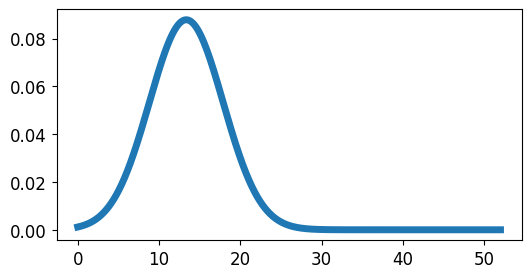

In [211]:
rv = norm(loc = 13.346938, scale = 4.540394) # loc = mean, scale = s.d
# championsKilled_mean = 13.346938
# championsKilled_std = 4.540394

x = np.arange(0. , 52. , 0.01) #X 확률변수 범위
y = rv.pdf(x) #X 범위에 따른 정규확률밀도값
fig, ax = plt.subplots(1,1) 
ax.plot(x, y)